#### Enesimum attemp to make a decent dimplification of WDPA

### Mapshaper commad used in Marxan:
!mapshaper -i /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825.shp snap combine-files \
        -simplify 25% planar keep-shapes \
        -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
        -filter-slivers min-area=10000m2 remove-empty \
        -clean rewind \
        -o /Users/tamarahuete/Documents/HALF_EARTH/Ecoregions2017_20210825_simple.shp format=shapefile force ndjson

In [1]:
#!pip install pandarallel

In [2]:
!nvm use 12.21.0
!npm i -g mapshaper@0.5.67

/bin/sh: nvm: command not found
npm WARN npm npm does not support Node.js v8.17.0
npm WARN npm You should probably upgrade to a newer version of node as we
npm WARN npm can't make any promises that npm will work with this version.
npm WARN npm You can find the latest version at https://nodejs.org/
npm ERR! URL is not definedarborist:ctor Completed in 0ms

npm ERR! A complete log of this run can be found in:
npm ERR!     /Users/tamarahuete/.npm/_logs/2021-12-13T09_01_29_447Z-debug.log


In [3]:
import geopandas as gpd
import pandas
import os
import json
from pandarallel import pandarallel
import topojson as tp
from zipfile import ZipFile
pandarallel.initialize(progress_bar=True, use_memory_fs=False, nb_workers=20)

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [23]:
zipfile = '/Users/tamarahuete/Documents/HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_all_with_oecm_wdpa_100mTol'
unzipfile = ZipFile(f'{zipfile}.zip').extractall(zipfile)
file_in = f'{zipfile}/WDPA_FILTERED_20210615_FILTERED_all_with_oecm_wdpa_100mTol.shp'
file_out = '/Users/tamarahuete/Documents/HALF_EARTH/WDPA_simple.shp'

In [24]:
### Inspect file
gdf = gpd.read_file(file_in)

In [7]:
len(gdf)

224133

In [24]:
gdf.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NA', 'DESIG', 'DESIG_E',
       'DESIG_T', 'IUCN_CA', 'INT_CRI', 'MARINE', 'REP_M_A', 'GIS_M_A',
       'REP_ARE', 'GIS_ARE', 'NO_TAKE', 'NO_TK_A', 'STATUS', 'STATUS_',
       'GOV_TYP', 'OWN_TYP', 'MANG_AU', 'MANG_PL', 'VERIF', 'METADAT',
       'SUB_LOC', 'PARENT_', 'ISO3', 'SUPP_IN', 'CONS_OB', 'SORTER',
       'WDPA_PID_h', 'WDPA_PID__', 'hash_vl', 'AREA_KM', 'MOL_ID', 'geometry'],
      dtype='object')

In [38]:
sub = gdf[['WDPA_PID','NAME','DESIG','DESIG_E','DESIG_T','IUCN_CA','MARINE','ISO3','OWN_TYP','AREA_KM','MOL_ID','geometry']]

In [14]:
!pwd

/Users/tamarahuete/Documents/Github_repos/he-scratchfolder


In [ ]:
#### Simplification is done in the he-scratch folder, but the outputs have been removed to avoid space issues

In [ ]:
!mapshaper-xl 16gb -i ./../../HALF_EARTH/WDPA_FILTERED_20210615_FILTERED_all_with_oecm_wdpa_100mTol/*.shp no-topology combine-files \
    -merge-layers \
    -each "group = Math.trunc(this.id/20000)+1" \
    -split group \
    -o WDPA_test/ format=geojson precision=0.0001 force ndjson

In [ ]:
!mapshaper-xl 16gb -i ./../../HALF_EARTH/WDPA_test/*.json snap combine-files -merge-layers -info

### Tests:
1. All commands: len 183665 (symp-wdpa.shp)
2. Remove the 'filter-slivers' option = len 19833 (symp-wdpa2.shp)
3. Remove the 'filter-slivers' and 'filter islands' option = len (symp-wdpa3.shp)
4. Remove the clean rewind option
The 4th option retains all geometries

In [ ]:
### First test with all
!mapshaper-xl 16gb -i ./WDPA_test/*.json snap \
    -simplify 20% planar keep-shapes \
    -filter-islands min-vertices=3 min-area=10000m2 remove-empty \
    -filter-slivers min-area=10000m2 remove-empty \
    -clean rewind \
    -o WDPA_test/ format=geojson force ndjson

In [17]:
### Only simplify
!mapshaper-xl 16gb -i ./WDPA_test/*.json snap \
    -simplify 20% planar keep-shapes \
    -o WDPA_test/ format=geojson force ndjson

Allocating 16 GB of heap memory
[i] Snapped 0 points
[simplify] Repaired 2,136 intersections; 3,292 intersections could not be repaired
[o] Wrote WDPA_test/1.json
[i] Snapped 0 points
[simplify] Repaired 2,479 intersections; 8,515 intersections could not be repaired
[o] Wrote WDPA_test/10.json
[i] Snapped 0 points
[simplify] Repaired 0 intersections; 21,482 intersections could not be repaired
[o] Wrote WDPA_test/11.json
[i] Snapped 0 points
[simplify] Repaired 0 intersections; 14,261 intersections could not be repaired
[o] Wrote WDPA_test/12.json
[i] Snapped 0 points
[simplify] Repaired 533 intersections; 6,289 intersections could not be repaired
[o] Wrote WDPA_test/2.json
[i] Snapped 0 points
[simplify] Repaired 1,719 intersections; 12,302 intersections could not be repaired
[o] Wrote WDPA_test/3.json
[i] Snapped 0 points
[simplify] Repaired 363 intersections; 4,818 intersections could not be repaired
[o] Wrote WDPA_test/4.json
[i] Snapped 0 points
[simplify] Repaired 116 intersection

In [20]:
!mapshaper-xl 16gb -i ./WDPA_test/*.json combine-files -merge-layers -info -o WDPA_test/symp-wdpa4.shp

Allocating 16 GB of heap memory
[info] 
Layer:    [unnamed layer]
--------------------------------------------------
Type:     polygon
Records:  224,133
Nulls:     1,610
Bounds:   -180,-85.4119,180,86.4531
CRS:      +proj=longlat +datum=WGS84
Source:   ./WDPA_test/1.json

Attribute data
------------+-------------------------------------
 Field      | First value
------------+-------------------------------------
 AREA_KM    |          1.136031298847187
 CONS_OB    | 'Not Applicable'
 DESIG      | 'Stewardship Area'
 DESIG_E    | 'Stewardship Area'
 DESIG_T    | 'National'
 GIS_ARE    |          1.13580554631289
 GIS_M_A    |          0
 GOV_TYP    | 'Federal or national ministry or agency'
 group      |          1
 hash_vl    | 1802338827
 INT_CRI    | 'Not Applicable'
 ISO3       | 'NZL'
 IUCN_CA    | 'III'
 MANG_AU    | 'Department of Conservation'
 MANG_PL    | 'Not Reported'
 MARINE     | '0'
 METADAT    |       1773
 MOL_ID     |          1
 NAME       | 'Boulder Beach'
 NO_TAKE  

In [21]:
### Inspect file
# original layer len 224133
#sim = gpd.read_file('WDPA_test/symp-wdpa.shp') # len 183665
#sim = gpd.read_file('WDPA_test/symp-wdpa2.shp') # len 19833
#sim = gpd.read_file('WDPA_test/symp-wdpa3.shp') # len 215940
sim = gpd.read_file('WDPA_test/symp-wdpa4.shp') # len 224133 ### retains all geometries

In [22]:
len(sim)

224133

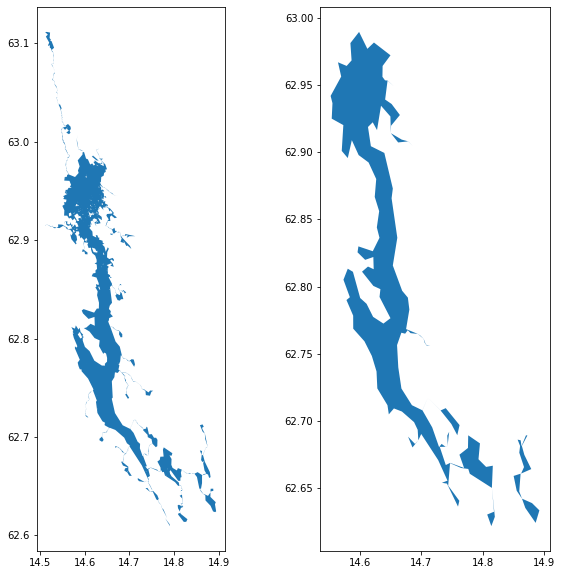

In [25]:
#sim2
import matplotlib.pyplot as plt
n = 555534286
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
gdf[gdf['WDPAID']==n].geometry.plot(ax = ax1) 
sim[sim['WDPAID']==n].geometry.plot(ax = ax2)

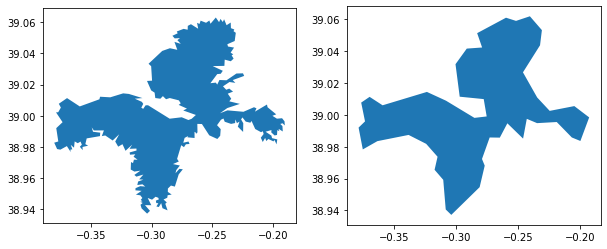

In [27]:
n=555523741
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
gdf[gdf['WDPAID']==n].geometry.plot(ax = ax1) 
sim[sim['WDPAID']==n].geometry.plot(ax = ax2)

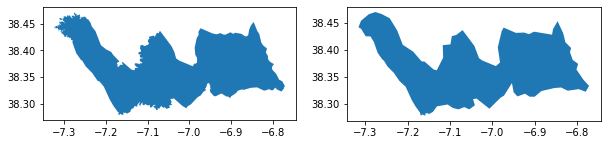

In [28]:
n= 555538632
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
gdf[gdf['WDPAID']==n].geometry.plot(ax = ax1) 
sim[sim['WDPAID']==n].geometry.plot(ax = ax2)

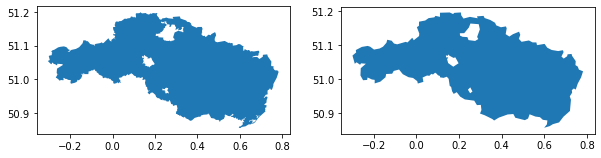

In [29]:
n = 20609
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
gdf[gdf['WDPAID']==n].geometry.plot(ax = ax1) 
sim[sim['WDPAID']==n].geometry.plot(ax = ax2)

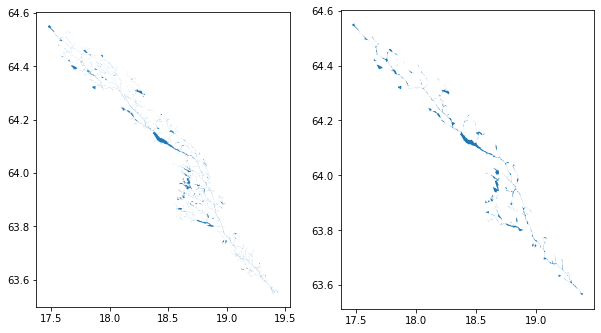

In [30]:
n = 555534655
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
gdf[gdf['WDPAID']==n].geometry.plot(ax = ax1) 
sim[sim['WDPAID']==n].geometry.plot(ax = ax2)

In [32]:
sim = sim.set_crs('EPSG:4326')

In [ ]:
sim.to_file('WDPA_test/symp-wdpa4.shp')